# Introduction

[Scipy](http://www.scipy.org/), and [Numpy](http://numpy.scipy.org/), provide a host of functions for performing statistical calculations. This article will describe ways of performing a few simple statistical calculations, as an introduction to using Scipy.

Scipy package is organized into several sub-packages. Before using any of these sub-packages, it must be explicitly imported. For example, to use functions in the `scipy.stats` package, we must execute:

In [6]:
from scipy import stats

Scipy is built on top of Numpy and uses Numpy arrays and data types. Hence we can use all the array manipulation and indexing methods provided by Numpy. Scipy imports all functions in the Numpy package, and several commonly used functions from sub-packages, into the top level namespace. For example, the Numpy `array` function is available as `scipy.array`. Similarly, the function `scipy.var` is the same as `numpy.var`. This means that we don’t have to explicitly import Numpy.

In this notebook, we will use the [matplotlib](http://matplotlib.sourceforge.net/) library for creating plots.

By convention, the top level Scipy package is imported as `sp` and the Numpy package, if needed, is imported as `np`.

In [7]:
import scipy as sp
import numpy as np

Matplotlib is imported in the following manner:

In [8]:
import matplotlib as mpl
from matplotlib import pyplot as plt
% matplotlib inline

To get help on any Scipy function or sub-package we can use the Scipy function `info`. For example, `scipy.info`(`scipy.stats`).

# Descriptive statistics

To illustrate basic functions we will use some pseudo-random numbers from a Gaussian or Normal distribution. The function `scipy.randn` can be used to generate random numbers from a standard Gaussian. This function is the same as the `numpy.random.randn` function.

In [10]:
s = sp.randn(100) # Hundred random numbers from Normal dist
print(len(s))

100


Since the value returned is a Numpy array we can use its methods to find descriptive statistics for the data.

In [11]:
print('Mean: {0:8.6f}'.format(s.mean()))
print('Minimum: {0:8.6f}'.format(s.min()))
print('Maximum: {0:8.6f}'.format(s.max()))
print('Variance: {0:8.6f}'.format(s.var()))
print('Standard Dev: {0:8.6f}'.format(s.std()))

Mean: -0.034303
Minimum: -1.921548
Maximum: 2.442108
Variance: 0.821751
Standard Dev: 0.906505


We can also use Scipy functions for performing the same calculations.

In [12]:
print('Mean: {0:8.6f}'.format(sp.mean(s)))
print('Standard Dev: {0:8.6f}'.format(sp.std(s)))

Mean: -0.034303
Standard Dev: 0.906505


The median can be calculated using:

In [13]:
print('Median: {0:8.6f}'.format(sp.median(s)))

Median: -0.106239


Note that both variance calculations above use N in the denominator i.e., they are biased estimators of the variance of the parent distribution. But when we are merely trying to describe the data, these are the appropriate equations to use.

The `scipy.var` function takes a keyword parameter `ddof` that can be used to change the denominator. The denominator is set as `N - ddof` and by default `ddof = 0`; set `ddof = 1.0` to find the unbiased estimator of the variance of the parent distribution.

In [14]:
print('Var with 0 ddof: {0:8.6f}'.format(sp.var(s)))
print('Var with 1 ddof: {0:8.6f}'.format(sp.var(s, ddof=1)))

Var with 0 ddof: 0.821751
Var with 1 ddof: 0.830051


The `scipy.stats` sub-package has a function `describe` that will provide most of the above numbers. In this case, the variance has `N - 1` in the denominator.

In [15]:
from scipy import stats

n, min_max, mean, var, skew, kurt = stats.describe(s)

print('Number of elements: {0:d}'.format(n))
print("Minimum: {0:8.6f} Maximum: {1:8.6f}".format(min_max[0], min_max[1]))
print("Mean: {0:8.6f}".format(mean))
print("Variance: {0:8.6f}".format(var))
print("Skew : {0:8.6f}".format(skew))
print("Kurtosis: {0:8.6f}".format(kurt))

Number of elements: 100
Minimum: -1.921548 Maximum: 2.442108
Mean: -0.034303
Variance: 0.830051
Skew : 0.319704
Kurtosis: -0.261859


# Probability distributions

Scipy has functions that deal with several common probability distributions. Currently there are 81 continuous probability distributions and 10 discrete distributions. These are defined in the `scipy.stats` sub-package. This package also defines several statistical functions.

Examples of continuous probability distributions are:

- norm : Normal or Gaussian
- chi2 : Chi-squared
- t : Student’s T
- uniform : Uniform

Examples of discrete probability distributions are:

- binom : Binomial
- poisson : Poisson

Examples of statistical functions:

- mode : Modal value
- moment : central moment
- describe: descriptive statistics
- histogram: histogram of data

There are two ways of using probability distribution functions.

*First*. Generate a “frozen” distribution object and then work with the methods of this object. A “frozen” distribution is one with its parameters set to specific values. For example a Gaussian with mean = 3.5 and standard deviation = 2.0.

To create a “frozen” Gaussian or Normal distribution with mean = 3.5 and standard deviation = 2.0 we can use.

In [16]:
n = stats.norm(loc=3.5, scale=2.0)

Then to draw a random number from this distribution we can execute:

In [20]:
n.rvs()

4.7214630978876553

For a normal distribution the keyword parameter `loc` defines the mean and the keyword parameter `scale` defines the standard deviation. For other distributions these will correspond to appropriate parameters of the distribution; the parameters needed by a distribution is specified in the docstring of the distribution, which can be viewed with the Python `help` function. For example, to view the docstring for the Poisson distribution we can use `help(stats.poisson)` or `scipy.info(stats.poisson)`. In the [iPython](http://ipython.scipy.org/) shell we can use `stats.poisson?`.

*Second*. Use functions in the appropriate class by always passing the parameters that define the distribution, when calling functions associated with the distribution.

For example, to draw a random number from a Gaussian or Normal distribution with mean = 3.5 and standard deviation = 2.0 we can use:

In [22]:
stats.norm.rvs(loc=3.5, scale=2.0)

6.1646346645038532

Given a probability distribution function we are interested in obtaining properties of the distribution. Functions are available for calculating the following important properties.

## Probability density function (PDF) and probability mass function (PMF)

For continuous variates the `probability density function` (PDF) is proportional to the probability of the variate being in a small interval about the given value. The probability of the variate being in a finite interval is the integral of the PDF over the interval.

The value of the PDF at any value of the variate can be obtained using the function pdf of the concerned distribution.

In [23]:
# PDF of Normal dist with mean = 0.0 and std dev = 1.0 at 0
stats.norm.pdf(0, loc=0.0, scale=1.0)

0.3989422804014327

We can also pass an array of values to this function, to get the PDF at the specified values of the variate:

In [25]:
stats.norm.pdf([-1.0, 0.0, 1.0], loc=0.0, scale=1.0)

array([ 0.24197072,  0.39894228,  0.24197072])

For discrete variates the `probability mass function` (PMF) gives the probability of the variate having a value x.

For example, for a binomial distribution with `p = 0.5` and number of trials `n = 10` we can calculate the PMF using the following:

In [26]:
tries = range(1, 11) # 1 to 10
print(stats.binom.pmf(tries, 10, 0.5))

[ 0.00976563  0.04394531  0.1171875   0.20507813  0.24609375  0.20507813
  0.1171875   0.04394531  0.00976563  0.00097656]


The following function plots the PMF of a binomial distribution with `n` tries and probability of success `p`.

In [27]:
def binom_pmf(n=4, p=0.5):
    # There are n+1 possible number of "successes": 0 to n.
    x = range(n+1)
    y = stats.binom.pmf(x, n, p)
    plt.plot(x, y, 'o', color='black')
    
    # Format x and y axes.
    plt.axis([-(max(x)-min(x))*0.05, max(x)*1.05, -0.01, max(y)*1.10])
    plt.xticks(x)
    plt.title('Binomial dist PMF for tries = {0} & p = {1}'.format(n, p))
    plt.xlabel('Variate')
    plt.ylabel('Probability')
    
    plt.draw()

The plot for the binomial distribution with `n = 10` and `p = 0.5` is show below.

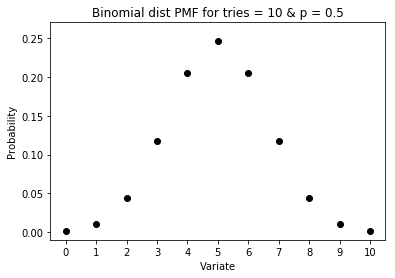

In [28]:
binom_pmf(n=10, p=0.5)

## Cumulative density function (CDF)

CDF gives the probability that the variate has a value less than or equal to the given value.

In [29]:
stats.norm.cdf(0.0, loc=0.0, scale=1.0)

0.5

The following function plots the CDF for a Gaussian distribution of given mean and standard deviation.

In [32]:
def norm_cdf(mean=0.0, std=1.0):
    # 50 numbers between -3σ and 3σ
    x = np.linspace(-3*std, 3*std, 50)
    # CDF at these values
    y = stats.norm.cdf(x, loc=mean, scale=std)
    
    plt.plot(x, y, color='black')
    plt.xlabel('Variate')
    plt.ylabel('Cumulative Probability')
    plt.title('CDF for Normal Dist of mean = {0} and std = {1}'.format(mean, std))
    
    plt.draw()

CDF for the Gaussian of mean = 0.0 and standard deviation = 1.0 is shown below.

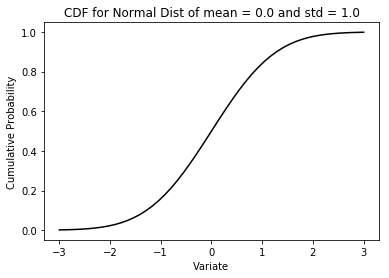

In [33]:
norm_cdf(mean=0.0, std=1.0)

## Percent point function (PPF) or inverse cumulative function

PPF is the inverse of the CDF. That is, PPF gives the value of the variate for which the cumulative probability has the given value.


In [34]:
stats.norm.ppf(0.5, loc=0.0, scale=1.0)

0.0

The following function plots the PPF for a Gaussian distribution.

In [35]:
def norm_ppf(mean=0.0, std=1.0):
    # 100 numbers bewteen 0.0 and 1.0, ie probabilities
    x = np.linspace(0.0, 1.0, 100)
    # PPF at these values
    y = stats.norm.ppf(x, loc=mean, scale=std)
    
    plt.plot(x, y, color='black')
    plt.xlabel('Cumulative Probability')
    plt.ylabel('Variate')
    plt.title('PPF for Normal Dist with mean = {0} and std = {1}'.format(mean, std))
    
    plt.show()

Example plot of PPF for Gaussian of mean = 0.0 and std. deviation = 1.0.

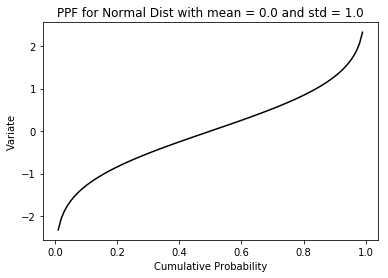

In [36]:
norm_ppf()

## Survival function (SF)

Survival function gives the probability that the variate has a value greater than the given value; `SF = 1 - CDF`.

In [37]:
stats.norm.sf(0.0, loc=0.0, scale=1.0)

0.5

A function for plotting the SF for a Gaussian with a given mean and std. deviation is shown below. An example plot for mean = 0.0 and std. deviation = 1.0 is also shown.

In [38]:
def norm_sf(mean=0.0, std=1.0):
    # 50 numbers between -3σ and 3 σ
    x = np.linspace(-3*std, 3*std, 50)
    # SF at these values
    y = stats.norm.sf(x, loc=mean, scale=std)
    
    plt.plot(x, y, color='black')
    plt.xlabel('Variate')
    plt.ylabel('Probability')
    
    plt.title('SF of Normal Dist with mean = {0} and std = {1}'.format(mean, std))
    plt.show()

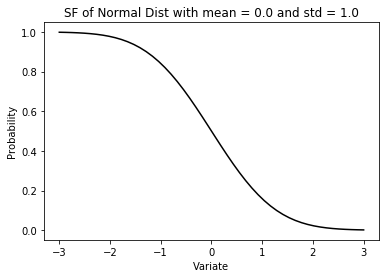

In [39]:
norm_sf()

## Inverse survival function (ISF)

ISF is the inverse of the survival function. It gives the value of the variate for which the survival function has the given value.


In [40]:
stats.norm.isf(.5, loc=0.0, scale=1.0)

0.0

Function to plot the ISF, and an example plot, for a Gaussian is given below.

In [41]:
def norm_isf(mean=0.0, std=1.0):
    # 100 numbers between 0.0 and 1.0, ie probabilities
    x = np.linspace(0.0, 1.0, 100)
    # ISF of these values
    y = stats.norm.isf(x, loc=mean, scale=std)
    
    plt.plot(x, y, color='black')
    plt.xlabel('Probability')
    plt.ylabel('Variate')
    plt.title('ISF of Normal Dist with mean = {0} and std = {1}'.format(mean, std))
    
    plt.show()

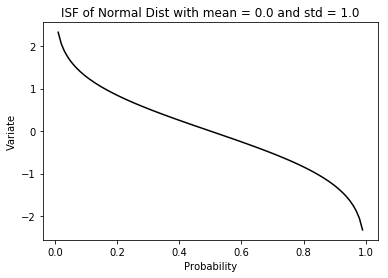

In [42]:
norm_isf()

## Random variates

A random value or several random values can be drawn from a distribution using the rvs method of the appropriate class.


In [43]:
# 100 random values from a Norma dist with μ = 1.0
stats.norm.rvs(loc=0.0, scale=1.0, size=100)

array([-0.36166893, -0.64830214, -0.22233958,  0.50552694,  1.66238075,
       -0.51750477, -0.57918175,  1.37170062, -0.63713595,  2.30774264,
       -1.04270832,  1.24899732,  1.11224144, -0.61433647,  0.22053757,
       -1.86814262,  0.13822175,  1.09362185,  0.70221894,  0.94060672,
       -1.2138521 , -0.5869317 , -0.2376226 ,  0.54696582, -1.74330085,
        0.91528093, -0.03272366, -1.28901577, -0.02440078,  1.05287162,
        0.64165471,  0.02454202, -0.73606019,  0.55767549, -1.06444607,
       -0.49785117,  1.65792754, -0.83775782, -1.14692041, -0.90924645,
        0.75348605, -1.69416801, -0.04180075,  1.16273623,  1.01798338,
       -2.02409705, -1.01775476,  2.57054081, -1.16743861,  0.31842874,
        0.11346119,  0.86849717,  0.0167034 , -1.3830372 , -0.81004678,
       -0.56496067, -0.37202027, -0.77772058, -2.6597644 ,  0.1797773 ,
       -0.50644295,  1.45922481,  1.04016716, -0.194764  ,  1.43084868,
       -0.50313854, -0.55287199, -0.59984975,  1.06141462,  1.56

In [44]:
# 100 random values from Poisson dist with μ = 1.0
stats.poisson.rvs(1.0, size=100)

array([0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 3, 2, 2,
       1, 1, 2, 1, 1, 1, 0, 1, 3, 1, 2, 1, 3, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2,
       2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 3, 1, 0, 1, 1, 1, 1, 0, 3, 1, 1, 0, 1,
       0, 2, 2, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 3, 0, 0,
       1, 1, 4, 0, 0, 2, 0, 0])

The following plot shows the histogram of events recorded in a series of 2 second intervals. The data is simulated by drawing 100 random events from a Poisson distribution with mean `μ` = 1.69. Also plotted is the Probability Mass Function (PMF) of the Poisson distribution with mean `μ` = 1.69. Poisson is a discrete distribution and the solid line is just a smooth line drawn through the points of the Poisson distribution PMF. The mean μ and the standard deviation `σ = sqrt(μ)` are marked.

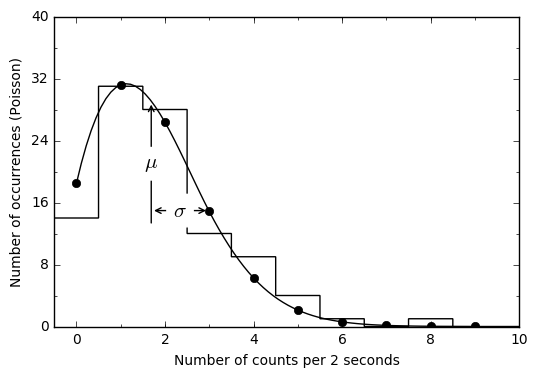

In [54]:
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
from scipy import interpolate
import warnings
warnings.filterwarnings('ignore')

def simulate_poisson():
    # Mean is 1.69
    mu = 1.69
    sigma = sp.sqrt(mu)
    mu_plus_sigma = mu + sigma

    # Draw random samples from the Poisson distribution, to simulate
    # the observed events per 2 second interval.
    counts = stats.poisson.rvs(mu, size=100)

    # Bins for the histogram: only the last bin is closed on both
    # sides. We need one more bin than the maximum value of count, so
    # that the maximum value goes in its own bin instead of getting
    # added to the previous bin.
    # [0,1), [1, 2), ..., [max(counts), max(counts)+1]
    bins = range(0, max(counts)+2)

    # Plot histogram.
    plt.hist(counts, bins=bins, align="left", histtype="step", color="black")

    # Create Poisson distribution for given mu.
    x = range(0,10)
    prob = stats.poisson.pmf(x, mu)*100 

    # Plot the PMF.
    plt.plot(x, prob, "o", color="black")

    # Draw a smooth curve through the PMF.
    l = sp.linspace(0,11,100)
    s = interpolate.spline(x, prob, l)
    plt.plot(l,s,color="black")

    plt.xlabel("Number of counts per 2 seconds")
    plt.ylabel("Number of occurrences (Poisson)")

    # Interpolated probability at x = μ + σ; for marking σ in the graph.
    xx = sp.searchsorted(l,mu_plus_sigma) - 1
    v = ((s[xx+1] -  s[xx])/(l[xx+1]-l[xx])) * (mu_plus_sigma - l[xx])
    v += s[xx]

    ax = plt.gca()
    # Reset axis range and ticks.
    ax.axis([-0.5,10, 0, 40])
    ax.set_xticks(range(1,10), minor=True)
    ax.set_yticks(range(0,41,8))
    ax.set_yticks(range(4,41,8), minor=True)

    # Draw arrow and then place an opaque box with μ in it.
    ax.annotate("", xy=(mu,29), xycoords="data", xytext=(mu, 13),
                textcoords="data", arrowprops=dict(arrowstyle="->",
                                                   connectionstyle="arc3"))
    bbox_props = dict(boxstyle="round", fc="w", ec="w")
    ax.text(mu, 21, r"$\mu$", va="center", ha="center",
            size=15, bbox=bbox_props)

    # Draw arrow and then place an opaque box with σ in it.
    ax.annotate("", xy=(mu,v), xytext=(mu_plus_sigma,v),
                arrowprops=dict(arrowstyle="<->", connectionstyle="arc3"))
    bbox_props = dict(boxstyle="round", fc="w", ec="w")
    ax.text(mu+(sigma/2.0), v, r"$\sigma$", va="center", ha="center",
            size=15, bbox=bbox_props)

    # Refresh plot and save figure.
    plt.draw()
    plt.savefig("simulate_poisson.png")

simulate_poisson()